In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### DATA PREPARATION

took block2C datasets for individual years and combined them.

In [2]:
# datasets of year 2021,2022,2021 respectively
block2C_df = pd.read_csv('/content/Block2C_21_24.csv')

In [3]:
# checking basic info for each for consistency
block2C_df.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'LGA', 'Sex', '0 to 4', '5 to 14',
       '15 to 24', '25 to 34', '35 to 44', '45 to 54', '55 to 64', '> 65',
       'Total', 'Year_Quarter'],
      dtype='object')

In [4]:
block2C_df.shape

(920, 15)

In [7]:
block2C_df.drop(columns=['Unnamed: 0'],inplace=True)

In [8]:
block2C_df.head()

,Year,Quarter,LGA,Sex,0 to 4,5 to 14,15 to 24,25 to 34,35 to 44,45 to 54,55 to 64,> 65,Total,Year_Quarter
0,2019,1,Birnin-Gwari,Male,0,0,2,4,3,4,3,1,17,2019 Q1
1,2019,1,Birnin-Gwari,Female,0,0,0,3,1,0,4,0,8,2019 Q1
2,2019,2,Birnin-Gwari,Male,0,0,3,2,2,2,0,2,11,2019 Q2
3,2019,2,Birnin-Gwari,Female,0,0,3,4,0,1,0,0,8,2019 Q2
4,2019,3,Birnin-Gwari,Male,0,0,1,2,2,0,2,6,13,2019 Q3


In [24]:
block2C_df = block2C_df.melt(
                    id_vars = ['Year','Quarter','Year_Quarter','LGA','Sex'],
                    value_vars = ['0 to 4', '5 to 14','15 to 24', '25 to 34', '35 to 44', '45 to 54', '55 to 64', '> 65',],
                    var_name = 'Age_Gr',
                    value_name = 'TB_Cases')
block2C_df.head()

,Year,Quarter,Year_Quarter,LGA,Sex,Age_Gr,TB_Cases
0,2019,1,2019 Q1,Birnin-Gwari,Male,0 to 4,0
1,2019,1,2019 Q1,Birnin-Gwari,Female,0 to 4,0
2,2019,2,2019 Q2,Birnin-Gwari,Male,0 to 4,0
3,2019,2,2019 Q2,Birnin-Gwari,Female,0 to 4,0
4,2019,3,2019 Q3,Birnin-Gwari,Male,0 to 4,0


## Data EDA

In [25]:
block2C_df.columns

Index(['Year', 'Quarter', 'Year_Quarter', 'LGA', 'Sex', 'Age_Gr', 'TB_Cases'], dtype='object')

In [26]:
block2C_df.shape

(7360, 7)

In [27]:
# checking for null values
block2C_df.isnull().sum()

Year            0
Quarter         0
Year_Quarter    0
LGA             0
Sex             0
Age_Gr          0
TB_Cases        0
dtype: int64

In [28]:
block2C_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7360 entries, 0 to 7359
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          7360 non-null   int64 
 1   Quarter       7360 non-null   int64 
 2   Year_Quarter  7360 non-null   object
 3   LGA           7360 non-null   object
 4   Sex           7360 non-null   object
 5   Age_Gr        7360 non-null   object
 6   TB_Cases      7360 non-null   object
dtypes: int64(2), object(5)
memory usage: 402.6+ KB


In [49]:
for i in range(len(block2C_df['TB_Cases'])):
  print(i )
  print(int(block2C_df['TB_Cases'][i]))

Streaming output truncated to the last 5000 lines.
9
3243
8
3244
5
3245
5
3246
11
3247
1
3248
3
3249
2
3250
2
3251
3
3252
2
3253
5
3254
10
3255
3
3256
9
3257
5
3258
10
3259
3
3260
9
3261
3
3262
12
3263
4
3264
10
3265
5
3266
9
3267
5
3268
9
3269
10
3270
7
3271
13
3272
12
3273
2
3274
8
3275
11
3276
21
3277
8
3278
22
3279
8
3280
7
3281
3
3282
3
3283
2
3284
2
3285
3
3286
1
3287
0
3288
3
3289
8
3290
4
3291
8
3292
7
3293
13
3294
7
3295
6
3296
7
3297
3
3298
7
3299
6
3300
5
3301
3
3302
2
3303
9
3304
36
3305
21
3306
62
3307
47
3308
62
3309
58
3310
101
3311
46
3312
16
3313
14
3314
13
3315
6
3316
8
3317
7
3318
7
3319
14
3320
25
3321
18
3322
43
3323
19
3324
75
3325
35
3326
95
3327
54
3328
144
3329
110
3330
133
3331
87
3332
88
3333
105
3334
80
3335
77
3336
23
3337
13
3338
32
3339
18
3340
35
3341
30
3342
34
3343
25
3344
4
3345
10
3346
7
3347
5
3348
7
3349
6
3350
7
3351
6
3352
6
3353
2
3354
4
3355
2
3356
9
3357
4
3358
13
3359
4
3360
20
3361
13
3362
25
3363
24
3364
33
3365
31
3366
66
3367
42
3368
30
3

ValueError: invalid literal for int() with base 10: '                    -  '

In [50]:
block2C_df['TB_Cases'][5742]

'                    -  '

In [53]:
block2C_df['TB_Cases'] = [str(i).strip() for i in block2C_df['TB_Cases']]
block2C_df['TB_Cases'] = block2C_df['TB_Cases'].replace('-','0')

In [54]:
block2C_df['TB_Cases'] = block2C_df['TB_Cases'].astype('int')

In [55]:
block2C_df['TB_Cases'].value_counts()

0      1738
1       905
2       690
3       544
4       450
       ... 
215       1
126       1
197       1
153       1
86        1
Name: TB_Cases, Length: 142, dtype: int64

In [56]:
block2C_df.describe()

,Year,Quarter,TB_Cases
count,7360.00000,7360.00000,7360.000000
mean,2021.00000,2.50000,10.128804
std,1.41431,1.11811,19.474332
min,2019.00000,1.00000,0.000000
25%,2020.00000,1.75000,1.000000
50%,2021.00000,2.50000,3.000000
75%,2022.00000,3.25000,10.000000
max,2023.00000,4.00000,215.000000


### Outliers

In [57]:
def find_upper_boundary(data,col):
  Q1 = data[col].quantile(.25)
  Q3 = data[col].quantile(.75)

  IQR = Q3-Q1

  return Q3+1.5*IQR

In [58]:
def locate_outliers(data,col):
  df = data.loc[data[col] > find_upper_boundary(data,col)]
  return df

In [59]:
locate_outliers(block2C_df,'TB_Cases')

,Year,Quarter,Year_Quarter,LGA,Sex,Age_Gr,TB_Cases
572,2022,3,2022 Q3,Giwa,Male,0 to 4,28
573,2022,3,2022 Q3,Giwa,Female,0 to 4,43
733,2022,3,2022 Q3,Zaria,Female,0 to 4,32
734,2022,4,2022 Q4,Zaria,Male,0 to 4,32
800,2023,1,2023 Q1,Kaduna North,Male,0 to 4,36
...,...,...,...,...,...,...,...
7239,2023,4,2023 Q4,Kachia,Female,> 65,35
7280,2023,1,2023 Q1,Kauru,Male,> 65,53
7348,2023,3,2023 Q3,Zango-Kataf,Male,> 65,25
7357,2023,3,2023 Q3,Zaria,Female,> 65,49


<Axes: xlabel='TB_Cases'>

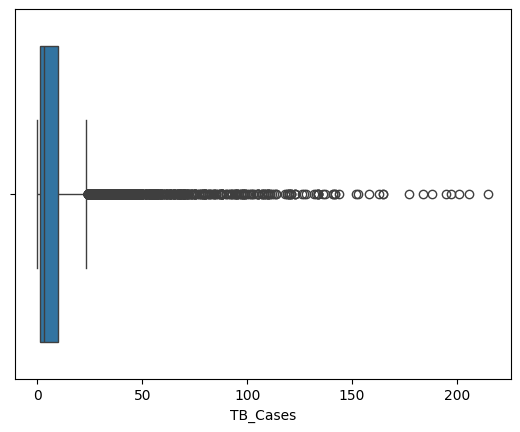

In [60]:
sns.boxplot(data = block2C_df,
            x = 'TB_Cases')

## UNIVARIATE ANALYSIS

### Year

In [61]:
block2C_df['Year'].value_counts()

2019    1472
2020    1472
2021    1472
2022    1472
2023    1472
Name: Year, dtype: int64

### Quarter

In [62]:
block2C_df['Quarter'].value_counts()

1    1840
2    1840
3    1840
4    1840
Name: Quarter, dtype: int64

### LGA

In [63]:
block2C_df['LGA'].value_counts()

Birnin-Gwari    320
Kaura           320
Zango-Kataf     320
Soba            320
Sanga           320
Sabon-Gari      320
Markafi         320
Lere            320
Kudan           320
Kubau           320
Kauru           320
Kajuru          320
Chikun          320
Kagarko         320
Kaduna South    320
Kaduna North    320
Kachia          320
Jema'a          320
Jaba            320
Ikara           320
Igabi           320
Giwa            320
Zaria           320
Name: LGA, dtype: int64

### Sex

In [64]:
block2C_df['Sex'].value_counts()

Male      3680
Female    3680
Name: Sex, dtype: int64

### Age_Gr

In [65]:
block2C_df['Age_Gr'].value_counts()

0 to 4      920
5 to 14     920
15 to 24    920
25 to 34    920
35 to 44    920
45 to 54    920
55 to 64    920
> 65        920
Name: Age_Gr, dtype: int64

### TB_Cases

Text(0.5, 1.0, 'TB_Cases Distribution')

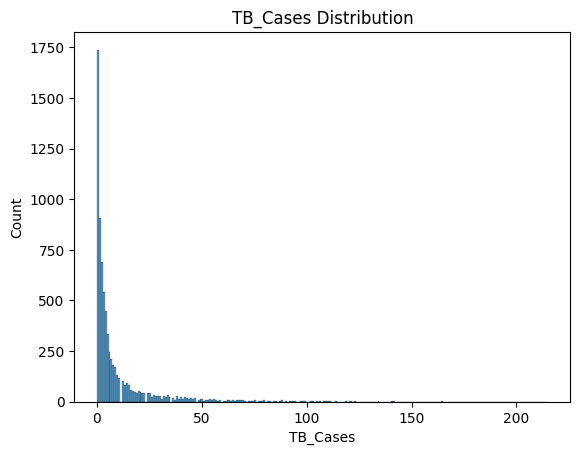

In [66]:
sns.histplot(block2C_df['TB_Cases'])
plt.xticks(minor=True)
plt.title('TB_Cases Distribution')

## BIVARIATE ANALYSIS

In [67]:
def data_group(data,group_by,aggregate_by,func):
  return data.groupby([group_by])[aggregate_by].aggregate(func)

### TB_Cases By Year

In [68]:
TB_Cases_By_Year = data_group(block2C_df,'Year','TB_Cases','sum')

In [69]:
TB_Cases_By_Year

Year
2019     4303
2020     5745
2021    10781
2022    21473
2023    32246
Name: TB_Cases, dtype: int64

Text(0.5, 1.0, 'TB_Cases By Year')

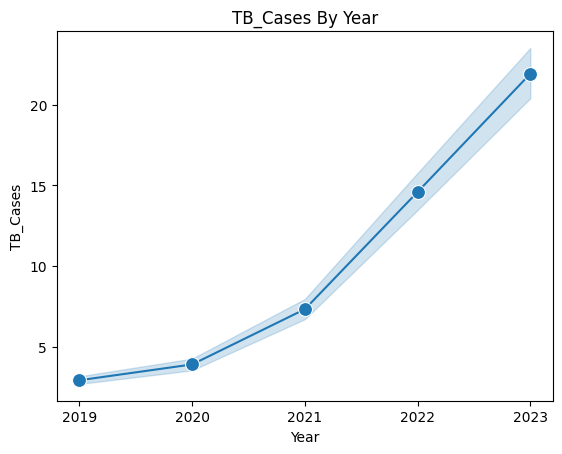

In [92]:
sns.lineplot(
    data = block2C_df,
    x = 'Year',
    y = 'TB_Cases',
    marker = 'o',
    markersize = 10
)

plt.xticks([2019.0,2020.0,2021.0,2022.0,2023.0],[2019,2020,2021,2022,2023])
plt.title('TB_Cases By Year')

### TB_Cases By Quarter

In [71]:
TB_Cases_By_Quarter = data_group(block2C_df,'Quarter','TB_Cases','sum')

In [72]:
TB_Cases_By_Quarter

Quarter
1    15113
2    16305
3    20250
4    22880
Name: TB_Cases, dtype: int64

Text(0.5, 1.0, 'TB_Cases By Quarter')

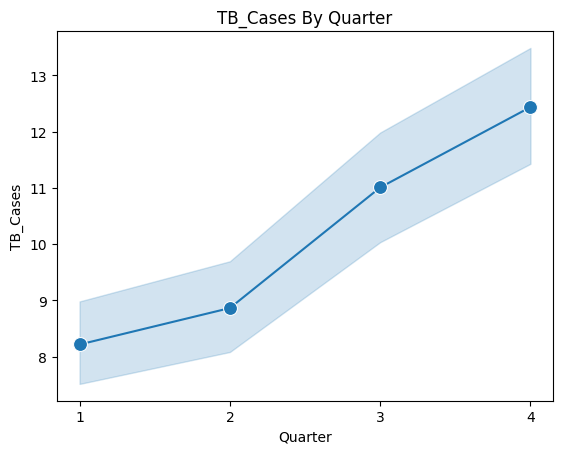

In [73]:
sns.lineplot(
    data = block2C_df,
    x = 'Quarter',
    y = 'TB_Cases',
    marker = 'o',
    markersize = 10
)

plt.xticks([1.0,2.0,3.0,4.0],[1,2,3,4])
plt.title('TB_Cases By Quarter')

### TB_Cases By LGA

In [74]:
TB_Cases_By_LGA = data_group(block2C_df,'LGA','TB_Cases','sum')

In [75]:
TB_Cases_By_LGA

LGA
Birnin-Gwari     1524
Chikun           4844
Giwa             5692
Igabi            3038
Ikara             940
Jaba              888
Jema'a           3105
Kachia           5511
Kaduna North    10685
Kaduna South     6964
Kagarko          1686
Kajuru           2747
Kaura             847
Kauru            5441
Kubau            1282
Kudan             775
Lere              939
Markafi          1719
Sabon-Gari       3704
Sanga             763
Soba             1215
Zango-Kataf      1853
Zaria            8386
Name: TB_Cases, dtype: int64

Text(0.5, 1.0, 'TB_Cases By LGA')

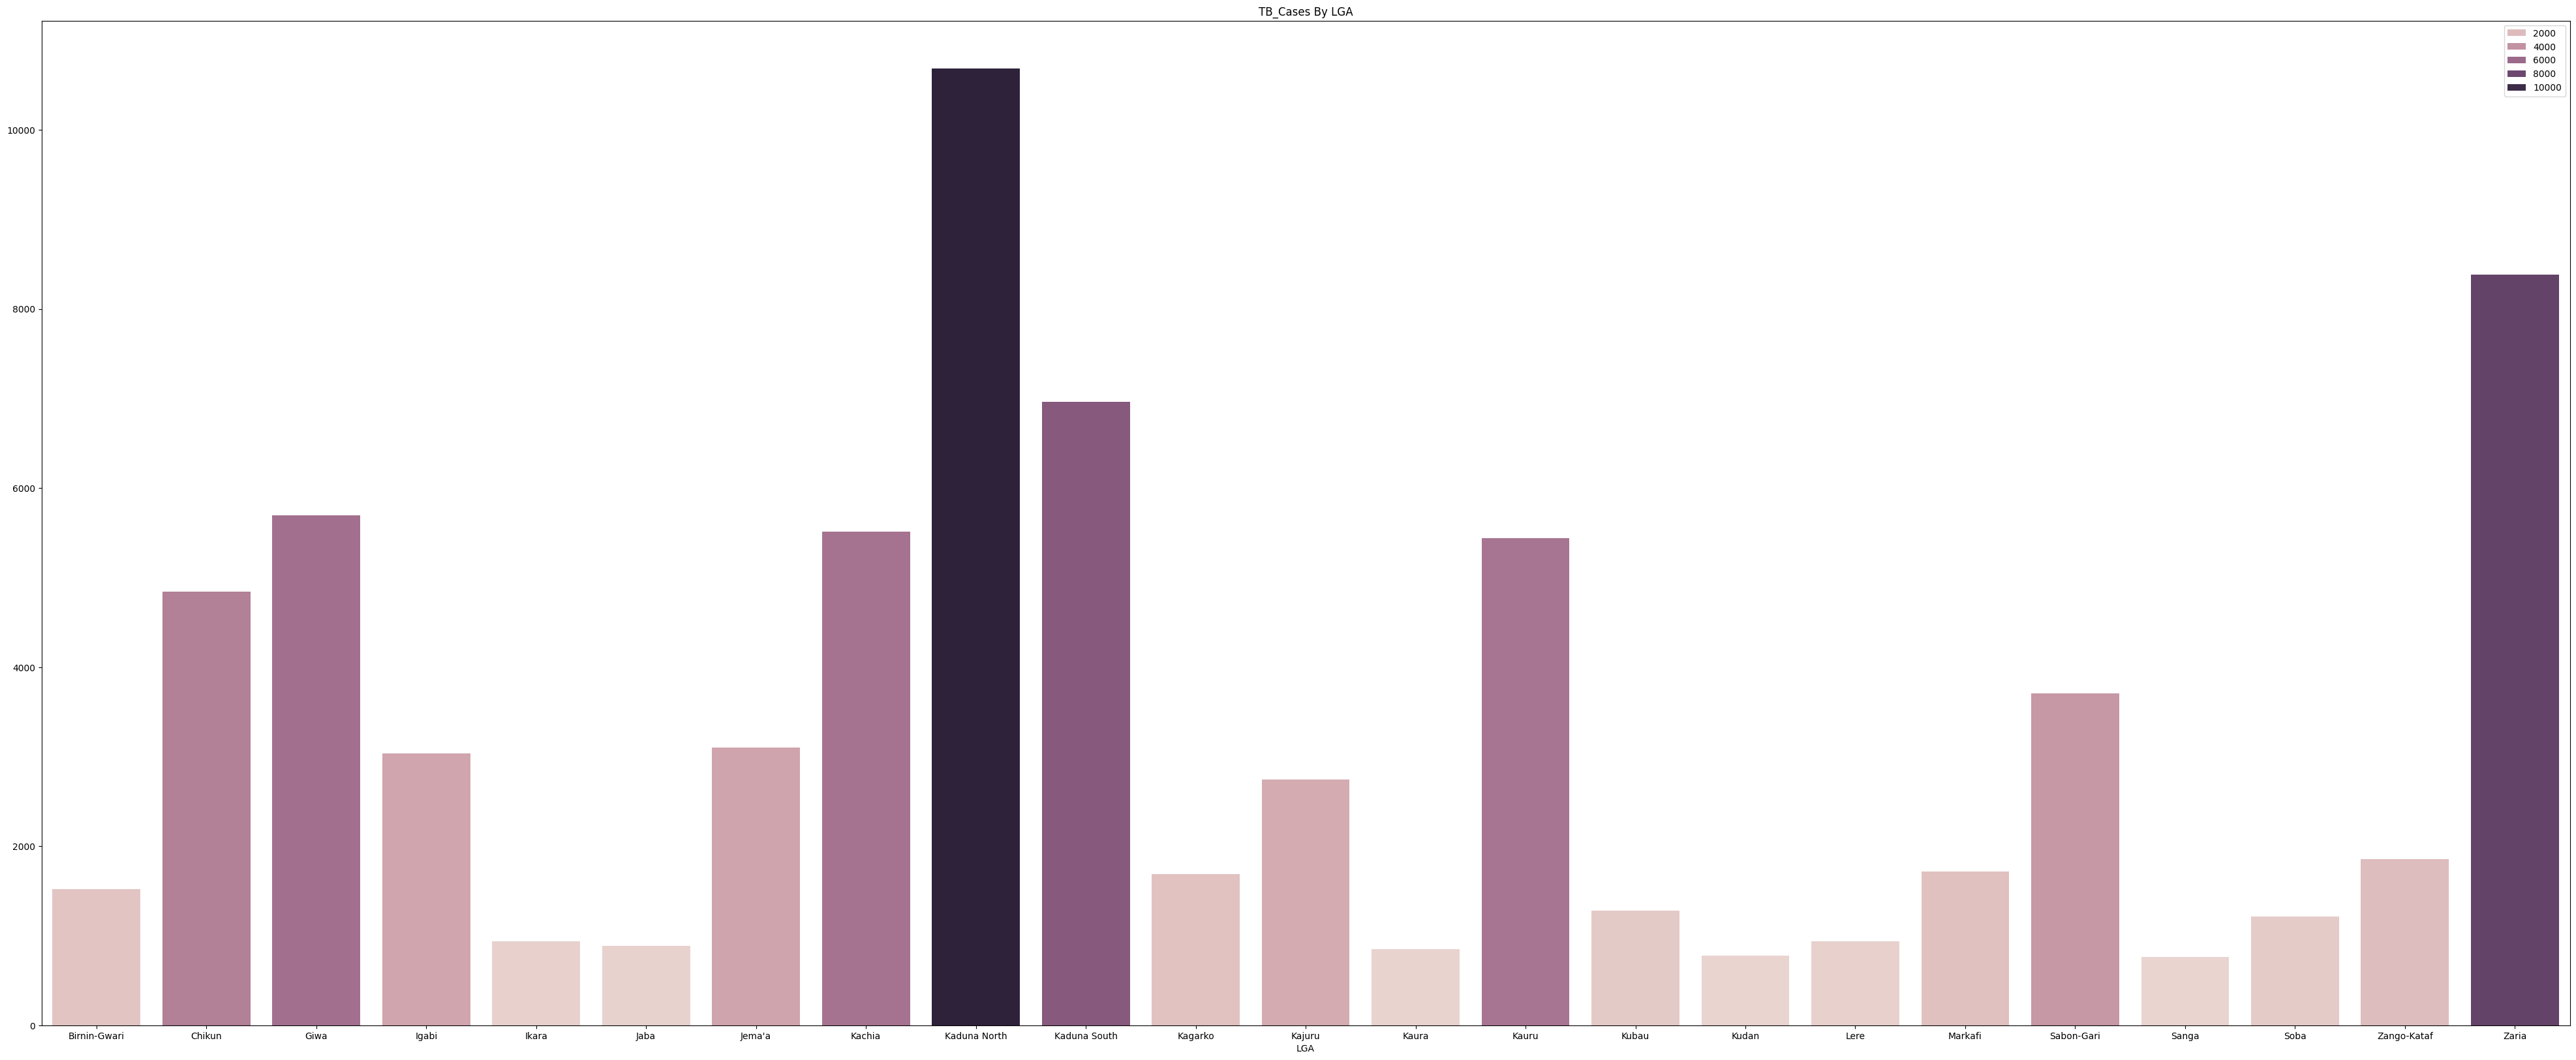

In [93]:
plt.figure(figsize=(50,20))
sns.barplot(
    x = TB_Cases_By_LGA.index,
    y = TB_Cases_By_LGA.values,
    hue = TB_Cases_By_LGA.values
)
plt.title('TB_Cases By LGA')

### TB_Cases By Gender

In [77]:
TB_Cases_By_Sex = data_group(block2C_df,'Sex','TB_Cases','sum')

In [78]:
TB_Cases_By_Sex

Sex
Female    30267
Male      44281
Name: TB_Cases, dtype: int64

Text(0.5, 1.0, 'TB_Cases By Gender')

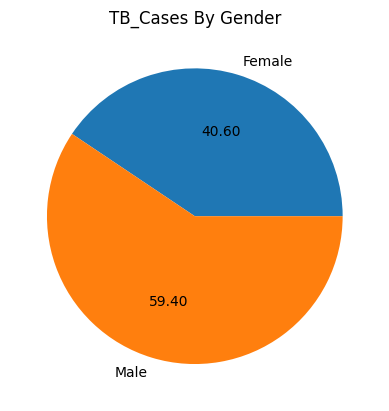

In [79]:
plt.pie(
    x = TB_Cases_By_Sex.values,
    labels = TB_Cases_By_Sex.index,
    autopct = "%.2f"
)
plt.title('TB_Cases By Gender')

### TB_Cases By Age_Gr

In [80]:
TB_Cases_By_AgeGr = data_group(block2C_df,'Age_Gr','TB_Cases','sum')

In [81]:
TB_Cases_By_AgeGr

Age_Gr
0 to 4       1819
15 to 24    12552
25 to 34    19698
35 to 44    16638
45 to 54    10755
5 to 14      3769
55 to 64     5848
> 65         3469
Name: TB_Cases, dtype: int64

Text(0.5, 1.0, 'TB_Cases By Age_Gr')

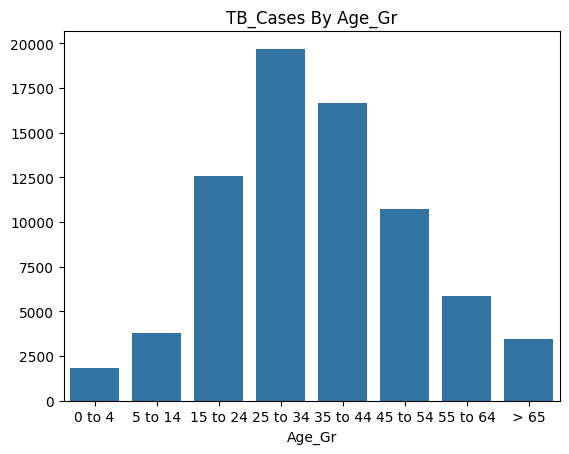

In [94]:
sns.barplot(
    x = TB_Cases_By_AgeGr.index,
    y = TB_Cases_By_AgeGr.values,
    order = ['0 to 4','5 to 14','15 to 24','25 to 34','35 to 44','45 to 54','55 to 64','> 65']
)
plt.title('TB_Cases By Age_Gr')

## MULTIVARIATE ANALYSIS

### TB Cases trend over years for each LGA

In [83]:
TB_Cases_Over_Years_For_LGA = block2C_df.groupby(['LGA','Year'])['TB_Cases'].sum().reset_index()

In [84]:
TB_Cases_Over_Years_For_LGA

,LGA,Year,TB_Cases
0,Birnin-Gwari,2019,68
1,Birnin-Gwari,2020,96
2,Birnin-Gwari,2021,259
3,Birnin-Gwari,2022,478
4,Birnin-Gwari,2023,623
...,...,...,...
110,Zaria,2019,428
111,Zaria,2020,717
112,Zaria,2021,1253
113,Zaria,2022,2680


Text(0.5, 0.98, 'TB Cases trend over years for each LGA')

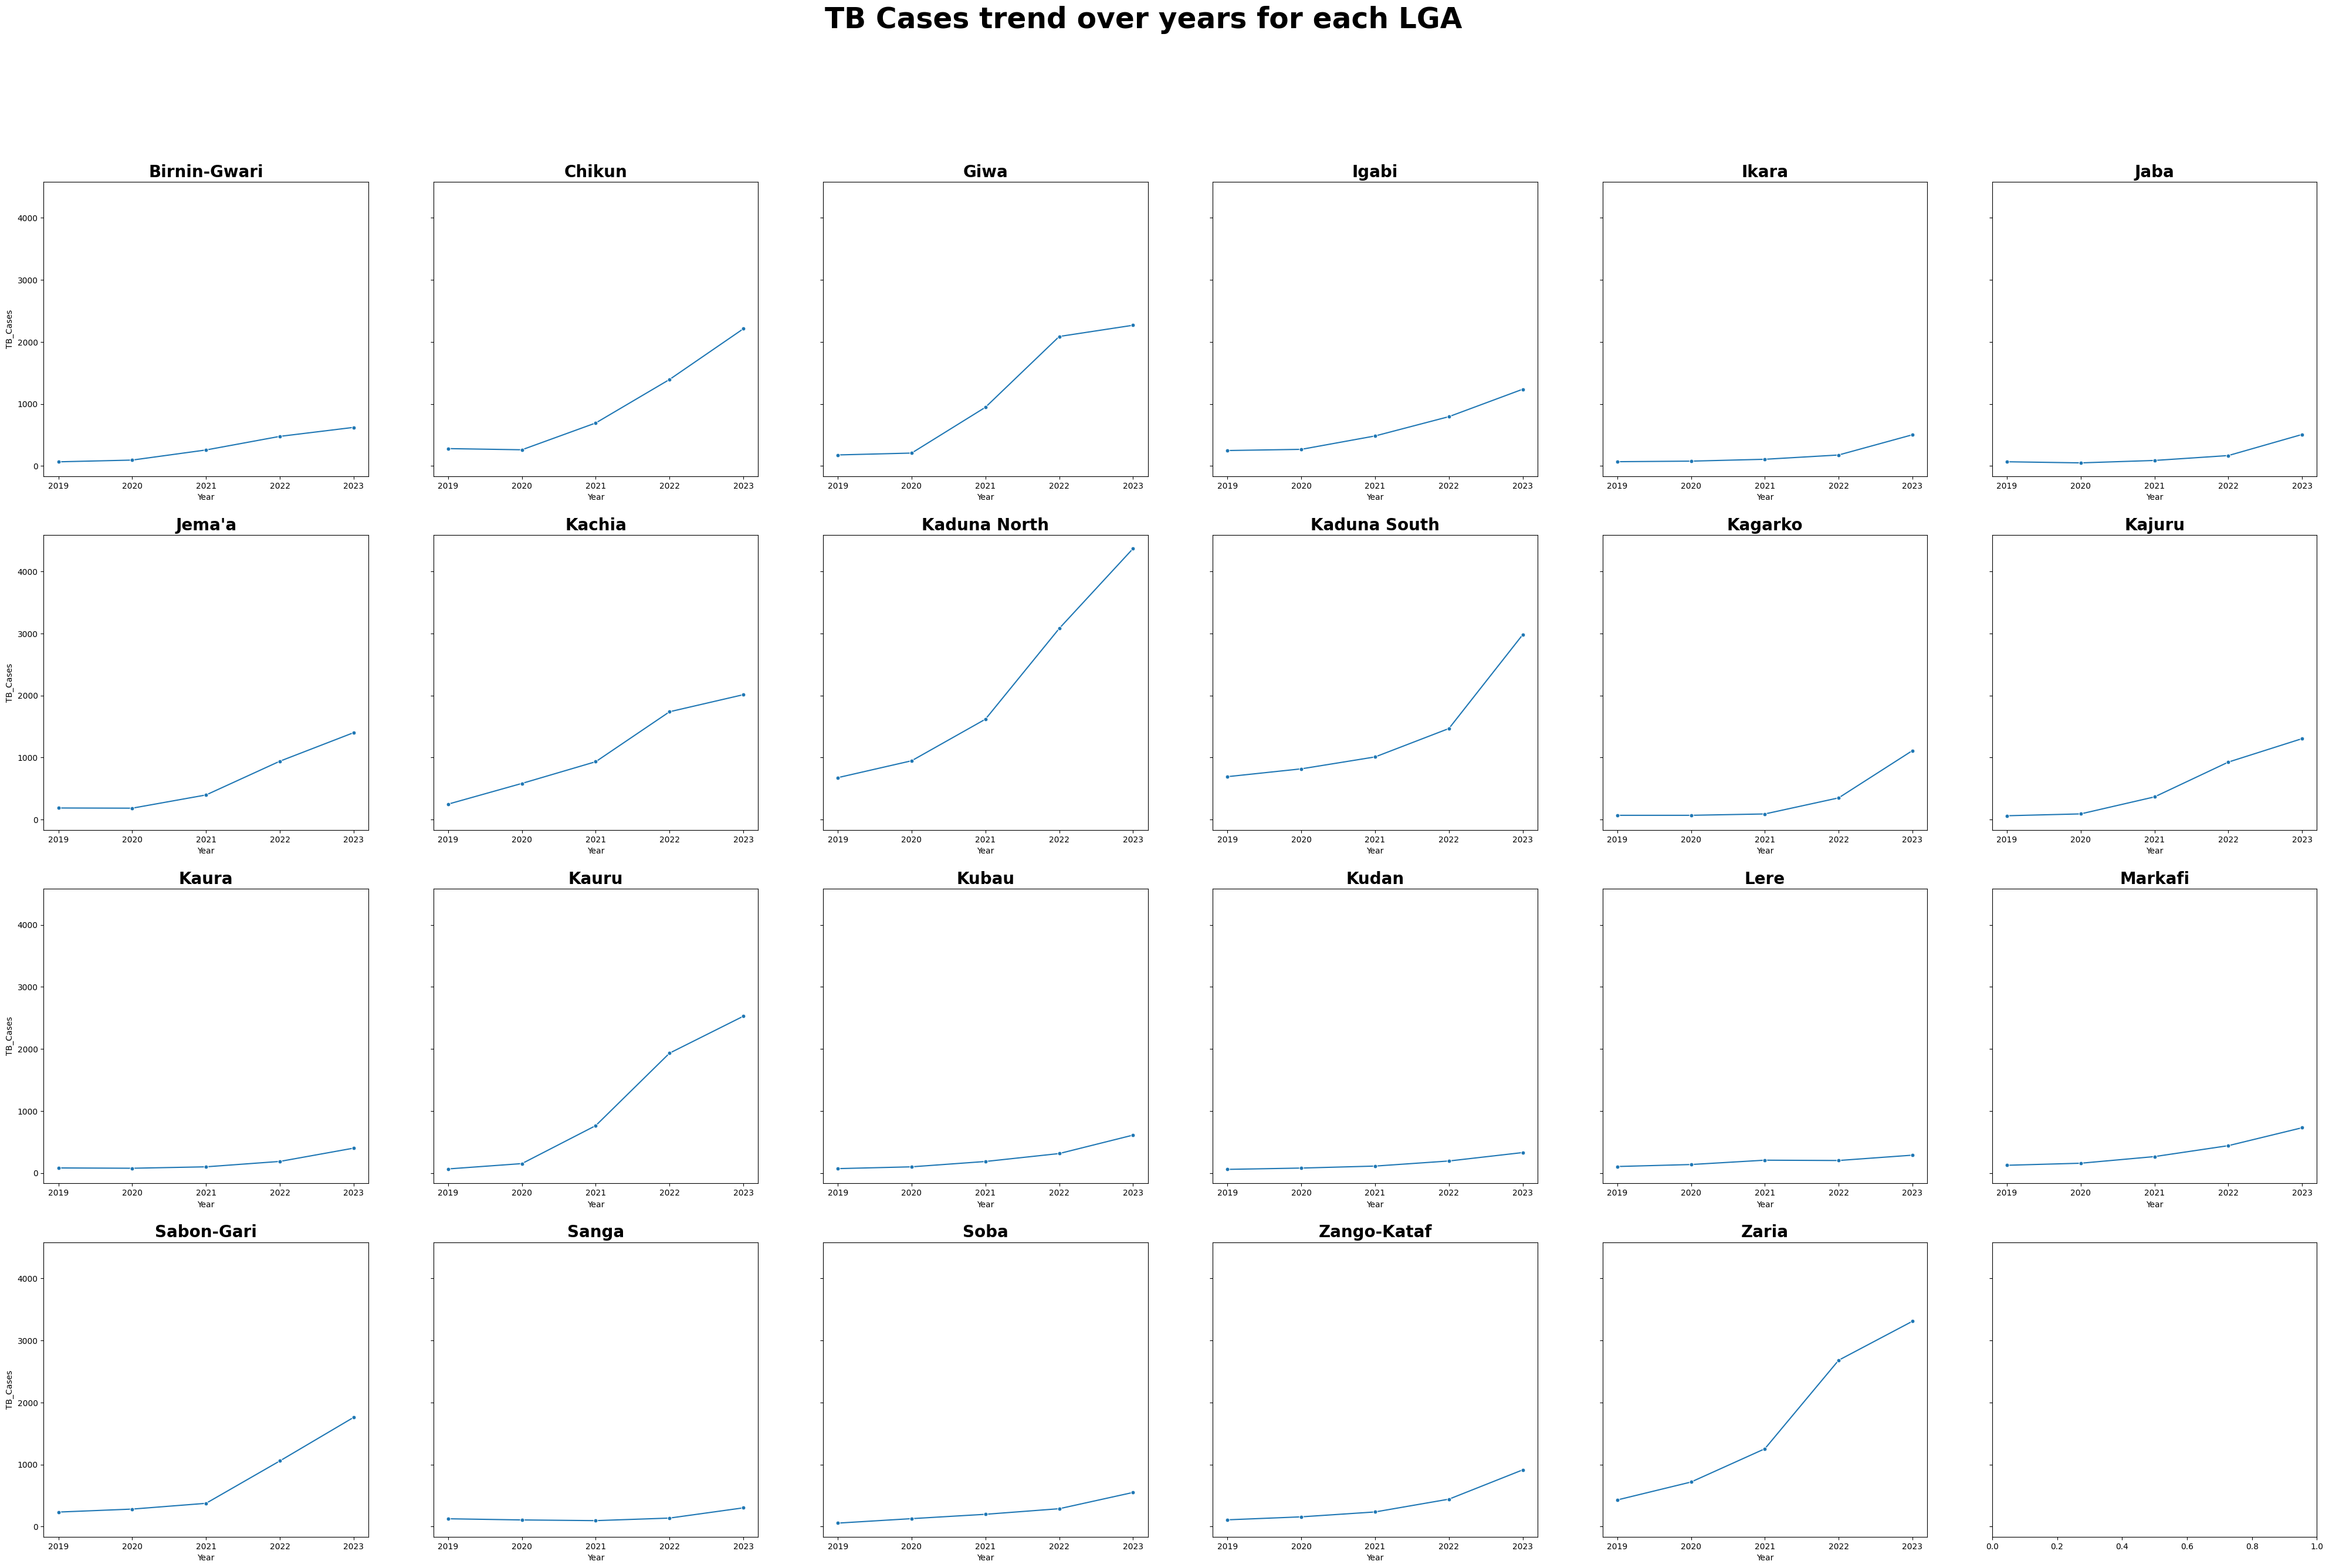

In [95]:
fig,axes = plt.subplots(4,6,sharey=True,figsize=(50,30))

i=0
j=0
for lga in pd.unique(block2C_df['LGA']):
  sns.lineplot(
      data =  TB_Cases_Over_Years_For_LGA.loc[TB_Cases_Over_Years_For_LGA['LGA']==lga],
      x = 'Year',
      y = 'TB_Cases',
      marker = 'o',
      markersize=5,
      ax = axes[i,j]
  )
  axes[i,j].set_xticks([2019.0,2020.0,2021.0,2022.0,2023.0],[2019,2020,2021,2022,2023])
  axes[i,j].set_title(lga,fontsize=20,fontweight='bold')
  j = j+1
  if j ==6:
    i = i+1
    j=0

plt.suptitle('TB Cases trend over years for each LGA',fontsize=35,fontweight='bold')

### TB_Cases_Over_Years_For_AgeGr

In [86]:
TB_Cases_Over_Years_For_AgeGr = block2C_df.groupby(['Age_Gr','Year'])['TB_Cases'].sum().reset_index()

In [87]:
TB_Cases_Over_Years_For_AgeGr

,Age_Gr,Year,TB_Cases
0,0 to 4,2019,89
1,0 to 4,2020,105
2,0 to 4,2021,137
3,0 to 4,2022,518
4,0 to 4,2023,970
5,15 to 24,2019,707
6,15 to 24,2020,978
7,15 to 24,2021,1935
8,15 to 24,2022,3451
9,15 to 24,2023,5481


Text(0.5, 0.98, 'TB Cases trend over years for each Age Gr.')

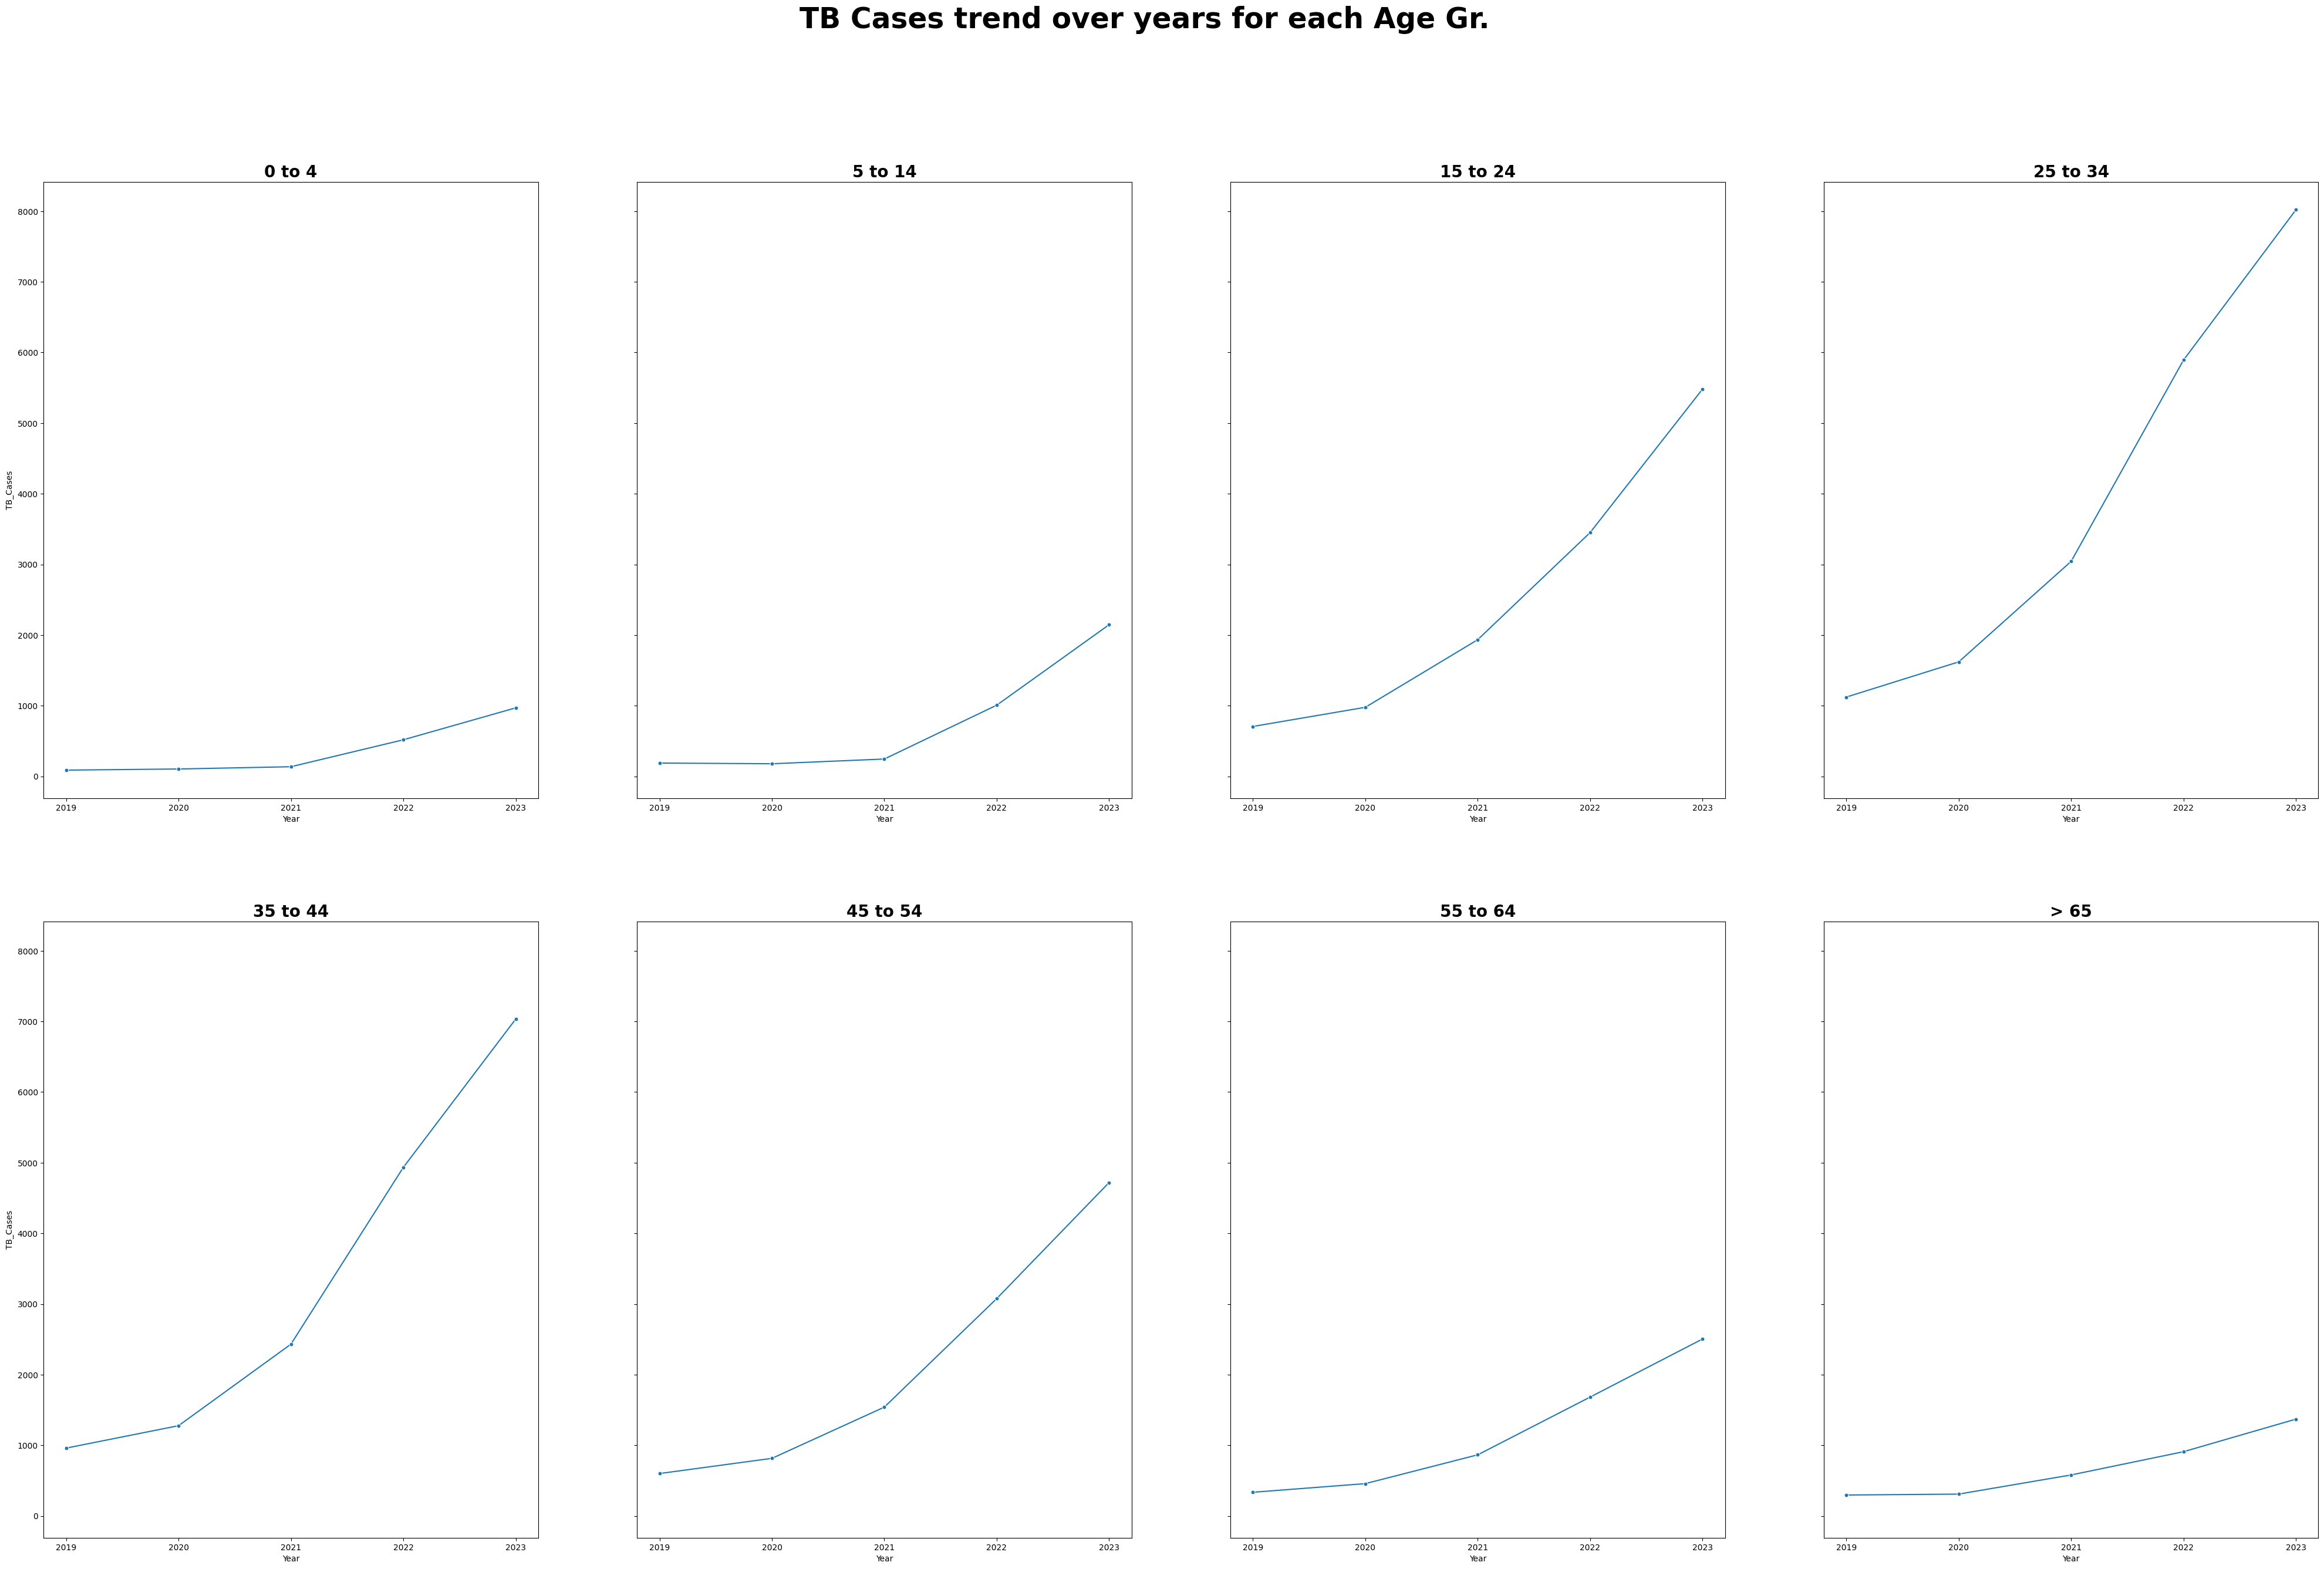

In [96]:
fig,axes = plt.subplots(2,4,sharey=True,figsize=(50,30))

i=0
j=0
for age in pd.unique(block2C_df['Age_Gr']):
  sns.lineplot(
      data =  TB_Cases_Over_Years_For_AgeGr.loc[TB_Cases_Over_Years_For_AgeGr['Age_Gr']==age],
      x = 'Year',
      y = 'TB_Cases',
      marker = 'o',
      markersize=5,
      ax = axes[i,j]
  )
  axes[i,j].set_xticks([2019.0,2020.0,2021.0,2022.0,2023.0],[2019,2020,2021,2022,2023])
  axes[i,j].set_title(age,fontsize=20,fontweight='bold')
  j = j+1
  if j ==4:
    i = i+1
    j=0

plt.suptitle('TB Cases trend over years for each Age Gr.',fontsize=35,fontweight='bold')

In [89]:
TB_Cases_Over_Years_For_Gender = block2C_df.groupby(['Sex','Year'])['TB_Cases'].sum().reset_index()

In [90]:
TB_Cases_Over_Years_For_Gender

,Sex,Year,TB_Cases
0,Female,2019,1548
1,Female,2020,2158
2,Female,2021,4241
3,Female,2022,8829
4,Female,2023,13491
5,Male,2019,2755
6,Male,2020,3587
7,Male,2021,6540
8,Male,2022,12644
9,Male,2023,18755


Text(0.5, 0.98, 'TB_Cases Over Years For Gender')

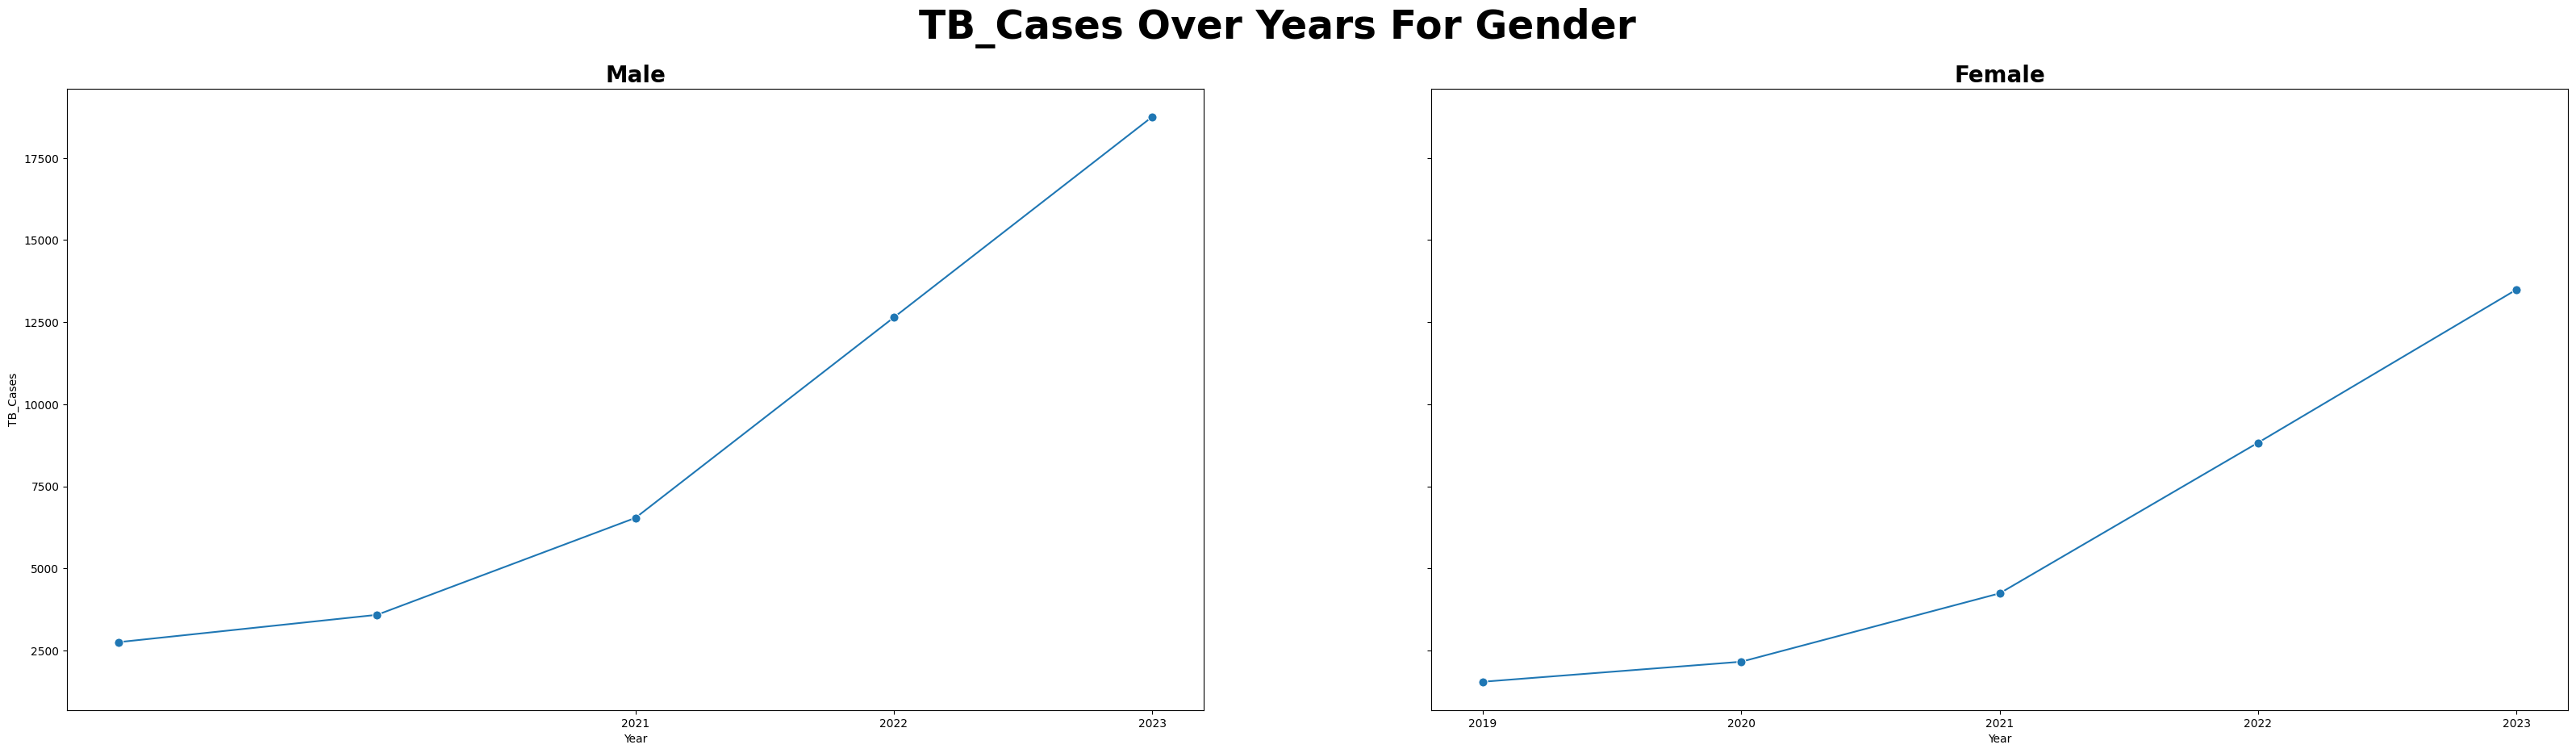

In [97]:
fig,axes = plt.subplots(1,2,sharey=True,figsize=(40,10))

sns.lineplot(
    data = TB_Cases_Over_Years_For_Gender.loc[TB_Cases_Over_Years_For_Gender['Sex'] == 'Male'],
    x = 'Year',
    y = 'TB_Cases',
    marker='o',
    markersize=8,
    ax=axes[0]
)
axes[0].set_xticks([2021.0,2022.0,2023.0],[2021,2022,2023])
axes[0].set_title('Male',fontsize=20,fontweight='bold')

sns.lineplot(
    data = TB_Cases_Over_Years_For_Gender.loc[TB_Cases_Over_Years_For_Gender['Sex'] == 'Female'],
    x = 'Year',
    y = 'TB_Cases',
    marker='o',
    markersize=8,
    ax=axes[1]
)
axes[1].set_xticks([2019.0,2020.0,2021.0,2022.0,2023.0],[2019,2020,2021,2022,2023])
axes[1].set_title('Female',fontsize=20,fontweight='bold')

plt.suptitle('TB_Cases Over Years For Gender',fontsize=35,fontweight='bold')

## DATA

In [98]:
block2C_df.to_csv('Block2C_df.csv')